In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv(r'C:\Users\shubh\OneDrive\Desktop\PythonPractice\D.A.Project\Zomato\data\zomato.csv', encoding = 'unicode_escape')

## Data PreProcessing

In [13]:
data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [14]:
data.shape

(9551, 21)

In [15]:
data.index

RangeIndex(start=0, stop=9551, step=1)

In [16]:
data.info

<bound method DataFrame.info of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208          Istanbul   
9547        5908749             Ceviz AÛôacÛ±           208          Istanbul   
9548        5915807                     Huqqa           208          Istanbul   
9549        5916112              Aôôk Kahve           208          Istanbul   
9550        5927402  Walter's Coffee Roastery           208          Istanbul

In [17]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [18]:
data.notnull().sum()

Restaurant ID           9551
Restaurant Name         9551
Country Code            9551
City                    9551
Address                 9551
Locality                9551
Locality Verbose        9551
Longitude               9551
Latitude                9551
Cuisines                9542
Average Cost for two    9551
Currency                9551
Has Table booking       9551
Has Online delivery     9551
Is delivering now       9551
Switch to order menu    9551
Price range             9551
Aggregate rating        9551
Rating color            9551
Rating text             9551
Votes                   9551
dtype: int64

In [19]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Exploratory Data Analysis (EDA)

#### The Distribution Of Restaurant Ratings

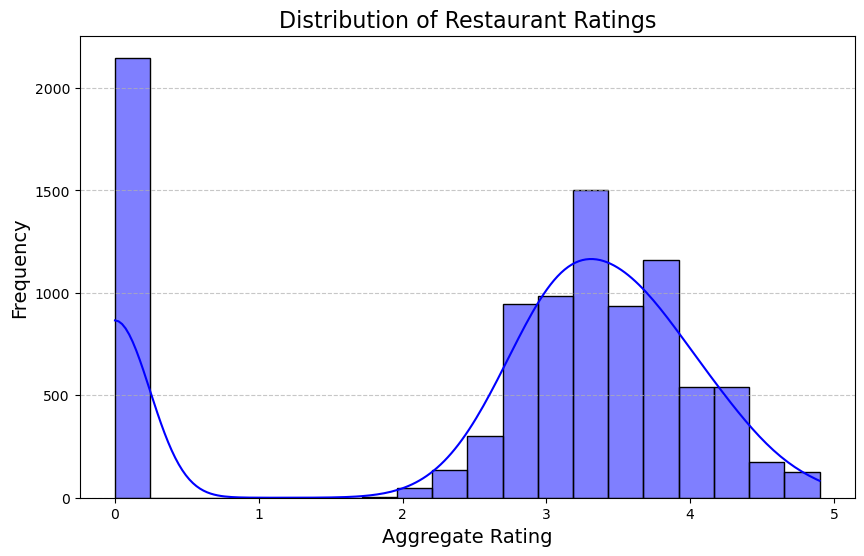

In [20]:
# Plot: Distribution of restaurant ratings
plt.figure(figsize=(10, 6))

sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='blue')

plt.title('Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#### Top 10 Most Common Cuisines

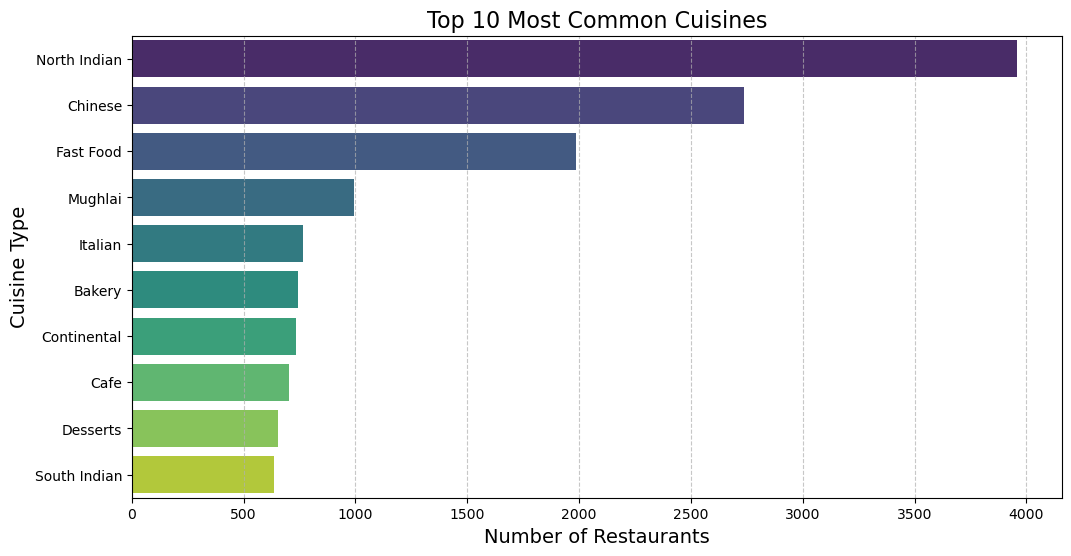

In [21]:
# Split and count cuisines
cuisines = data['Cuisines'].dropna().str.split(', ').explode()
cuisine_counts = cuisines.value_counts().head(10)  # Top 10 cuisines

# Plot: Top 10 Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="viridis", hue=cuisine_counts.index, dodge=False, legend=False)
plt.title('Top 10 Most Common Cuisines', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Distribution Of Restaurants By Price Range

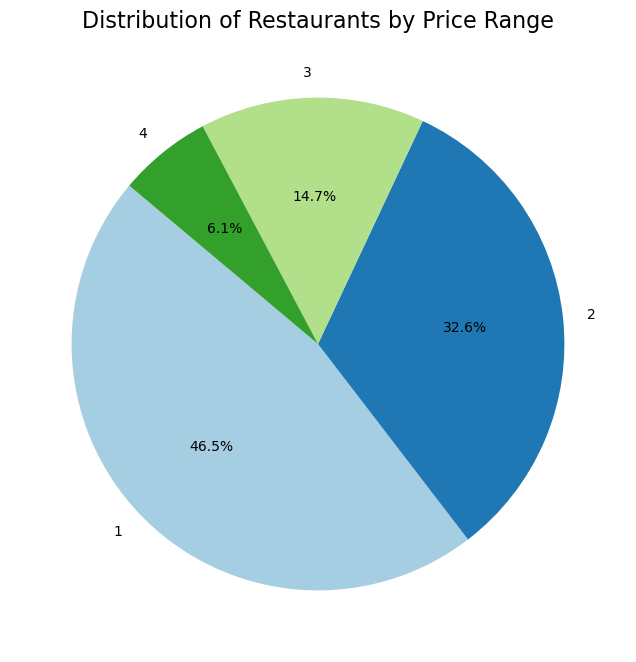

In [22]:
# Count restaurants by price range
price_range_counts = data['Price range'].value_counts().sort_index()

# Plot: Price Range Distribution
plt.figure(figsize=(8, 8))
plt.pie(
    price_range_counts,
    labels=price_range_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Distribution of Restaurants by Price Range', fontsize=16)
plt.show()

#### Relationship Between The Restaurant's Aggregate Rating And The Number Of Votes

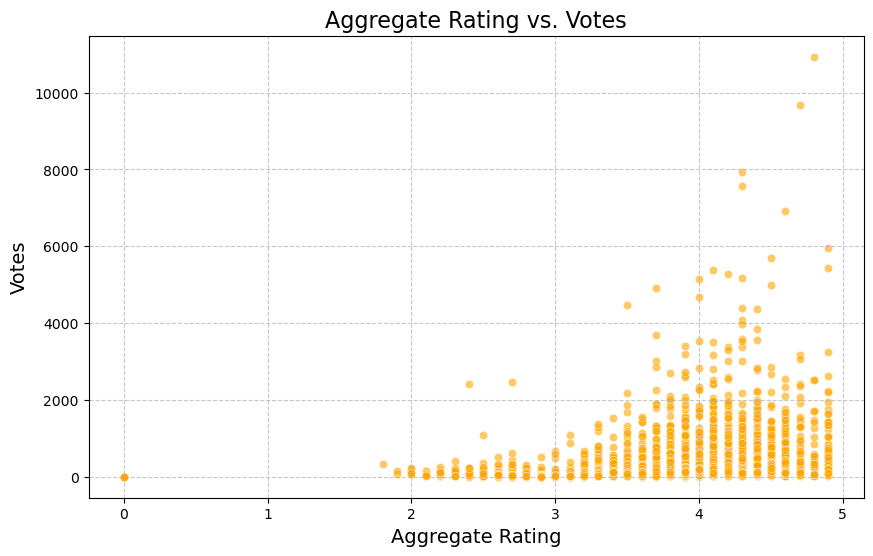

Correlation between Aggregate Rating and Votes: 0.31


In [23]:
# Scatter Plot: Aggregate Rating vs. Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Votes', data=data, alpha=0.6, color='orange')
plt.title('Aggregate Rating vs. Votes', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Correlation Coefficient
correlation = np.corrcoef(data['Aggregate rating'], data['Votes'])[0, 1]
print(f"Correlation between Aggregate Rating and Votes: {correlation:.2f}")

#### Cities Dominating In Terms Of Restaurant Counts

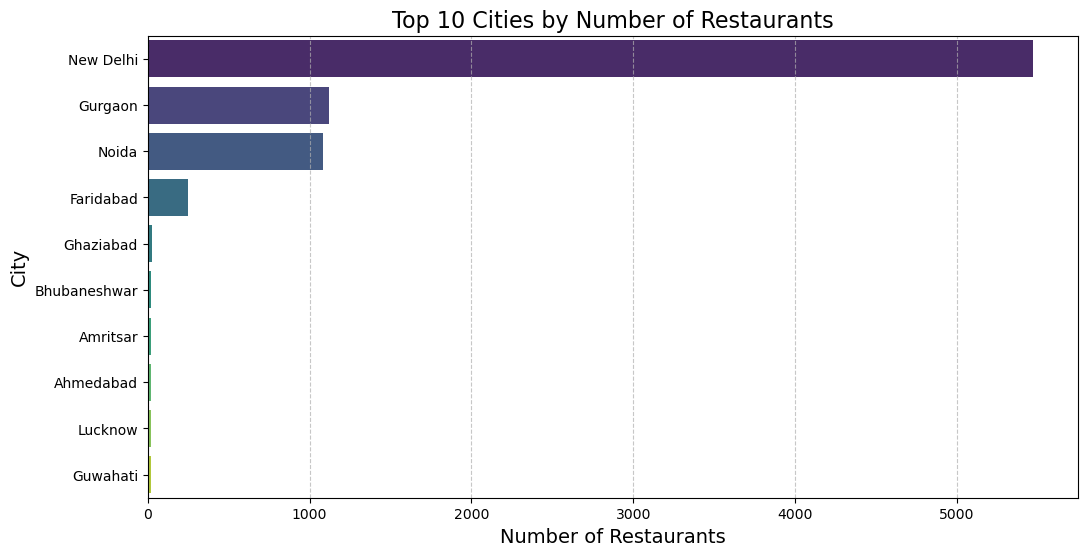

In [24]:
# Top 10 Cities with Most Restaurants
top_cities = data['City'].value_counts().head(10)

# Plot: Top Cities by Restaurant Count
plt.figure(figsize=(12, 6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="viridis", hue=top_cities.index, dodge=False, legend=False)
plt.title('Top 10 Cities by Number of Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Overall Relationship Between Numeric Variables

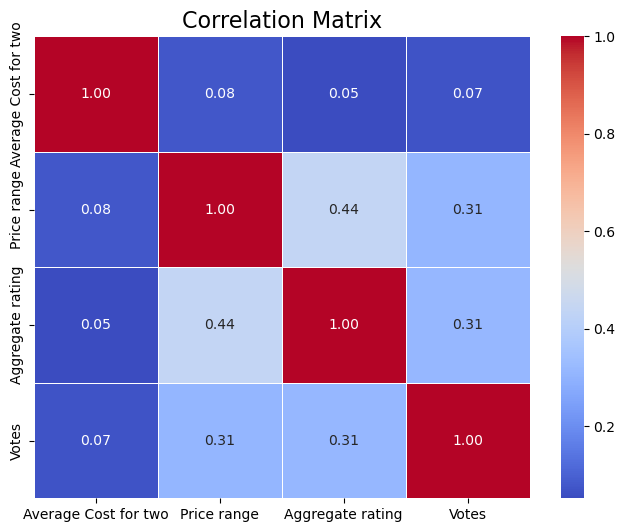

In [25]:
# Select numeric columns
numeric_cols = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
correlation_matrix = data[numeric_cols].corr()

# Heatmap: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

#### Comparing The Average Cost Across Different Price Ranges.

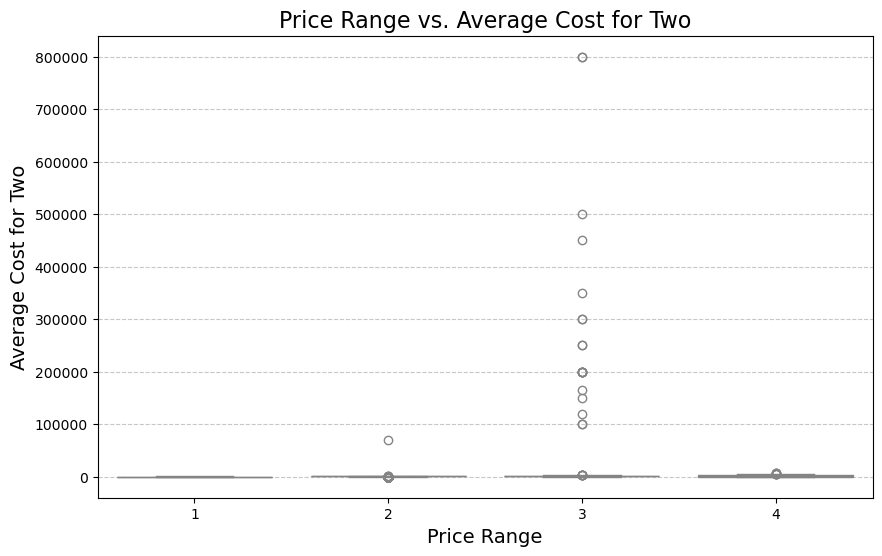

In [26]:
# Box Plot: Price Range vs. Average Cost for Two
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Average Cost for two', data=data, palette='coolwarm', hue='Price range'.index, legend=False)
plt.title('Price Range vs. Average Cost for Two', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Average Cost for Two', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Top 10 Localities By Number Of Restraurants

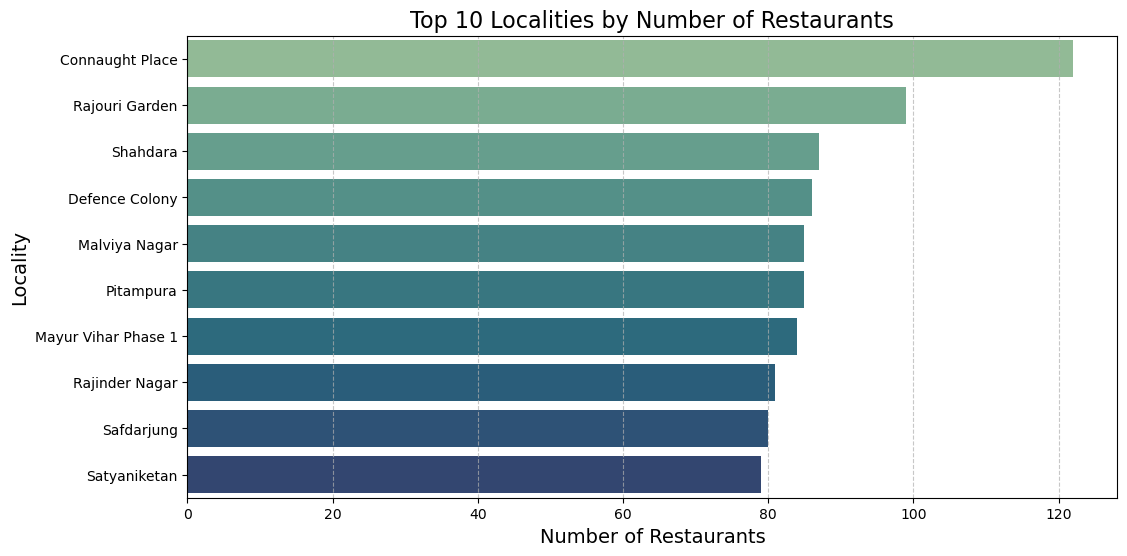

In [27]:
# Top 10 Locations with Most Restaurants
top_locations = data['Locality'].value_counts().head(10)

# Plot: Top Locations by Restaurant Count
plt.figure(figsize=(12, 6))
sns.barplot(y=top_locations.index, x=top_locations.values, palette="crest", hue=top_locations.index, legend=False)
plt.title('Top 10 Localities by Number of Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=14)
plt.ylabel('Locality', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Commonly Used Delivery Services

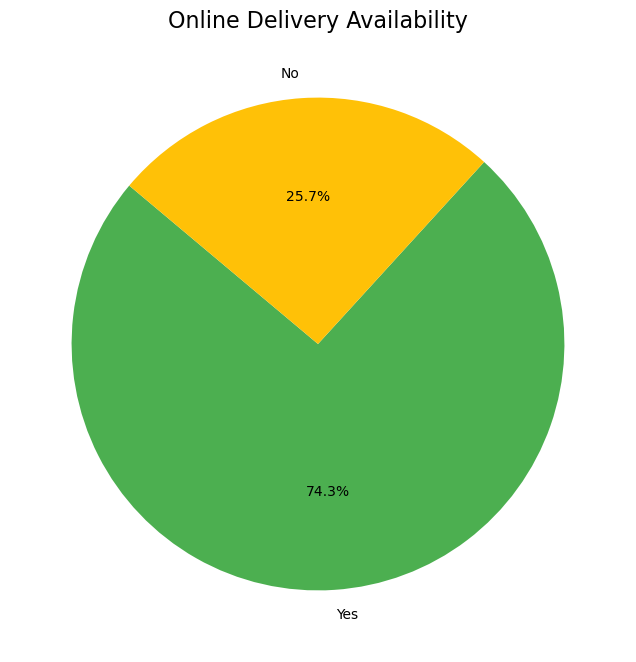

In [29]:
# Count of Online Delivery Availability
delivery_counts = data['Has Online delivery'].value_counts()

# Plot: Online Delivery Availability
plt.figure(figsize=(8, 8))
plt.pie(
    delivery_counts,
    labels=['Yes', 'No'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#FFC107']
)
plt.title('Online Delivery Availability', fontsize=16)
plt.show()